In [12]:
# ====================================================================
# LANGKAH 1: PENGATURAN PROYEK DAN IMPOR LIBRARY
# ====================================================================

# Library dasar untuk manipulasi data dan numerik
import pandas as pd
import numpy as np
import os
import json

# Library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# Library untuk machine learning dari Scikit-Learn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, roc_auc_score, ConfusionMatrixDisplay
)

# Library untuk mengatasi class imbalance
from imblearn.over_sampling import SMOTE

# Library untuk menyimpan model
import joblib

# --- Pengaturan Tampilan (Opsional tapi membantu) ---
# Menampilkan plot langsung di notebook
%matplotlib inline
# Mengatur gaya plot default
sns.set(style='whitegrid')
# Mengatur ukuran gambar default
plt.rcParams['figure.figsize'] = (10, 6)

# --- Persiapan Folder Output ---
# Membuat folder 'artifacts' untuk menyimpan model, scaler, dll.
os.makedirs('artifacts', exist_ok=True)

print("✅ Langkah 1 Selesai: Semua library siap dan folder artifacts telah dibuat.")
print("Versi pandas yang digunakan:", pd.__version__)

✅ Langkah 1 Selesai: Semua library siap dan folder artifacts telah dibuat.
Versi pandas yang digunakan: 2.3.3


In [13]:
# ====================================================================
# LANGKAH 2: MEMUAT DAN MEMERIKSA DATA
# ====================================================================

# Tentukan nama file dataset Anda
file_path = "credit_card_data.csv"

# Muat dataset
df = pd.read_csv(file_path)

# --- Pemeriksaan Awal ---

# 1. Tampilkan dimensi (jumlah baris dan kolom)
print(f"Dataset berhasil dimuat. Ukuran: {df.shape[0]} baris, {df.shape[1]} kolom.")

# 2. Tampilkan 5 baris pertama
print("\nLima baris pertama dari data:")
display(df.head())

# 3. Tampilkan informasi ringkas (tipe data & nilai non-null)
print("\nInformasi teknis dataset:")
# Tampilan .info() akan langsung tercetak di bawah sel
df.info()

# 4. Tampilkan ringkasan statistik untuk kolom numerik
print("\nStatistik deskriptif untuk fitur numerik:")
display(df.describe().T)

Dataset berhasil dimuat. Ukuran: 30000 baris, 25 kolom.

Lima baris pertama dari data:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



Informasi teknis dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-nu

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


In [14]:
# ====================================================================
# LANGKAH 3: PEMBERSIHAN DAN PRA-PEMROSESAN AWAL
# ====================================================================

# 1. Buat salinan DataFrame untuk keamanan
df_clean = df.copy()

# 2. Hapus kolom 'ID' karena tidak relevan untuk prediksi
if 'ID' in df_clean.columns:
    df_clean = df_clean.drop(columns=['ID'])
    print("Kolom 'ID' berhasil dihapus.")

# 3. Perbaiki dan gabungkan kategori yang ambigu atau tidak terdefinisi
# EDUCATION: Nilai 0, 5, 6 tidak terdefinisi di dokumentasi, kita gabungkan ke 4 (Lainnya)
if 'EDUCATION' in df_clean.columns:
    df_clean['EDUCATION'] = df_clean['EDUCATION'].replace({0: 4, 5: 4, 6: 4})
    print("Nilai pada kolom 'EDUCATION' telah diperbaiki.")

# MARRIAGE: Nilai 0 tidak terdefinisi, kita gabungkan ke 3 (Lainnya)
if 'MARRIAGE' in df_clean.columns:
    df_clean['MARRIAGE'] = df_clean['MARRIAGE'].replace({0: 3})
    print("Nilai pada kolom 'MARRIAGE' telah diperbaiki.")

# 4. Ubah tipe data kolom kategorikal menjadi 'category' untuk kejelasan
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
for col in categorical_cols:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].astype('category')
print("Tipe data kolom kategorikal telah diubah.")

# --- Verifikasi Hasil ---
print("\nLima baris pertama dari data setelah dibersihkan:")
display(df_clean.head())

print("\nTipe data baru:")
display(df_clean.dtypes)

Kolom 'ID' berhasil dihapus.
Nilai pada kolom 'EDUCATION' telah diperbaiki.
Nilai pada kolom 'MARRIAGE' telah diperbaiki.
Tipe data kolom kategorikal telah diubah.

Lima baris pertama dari data setelah dibersihkan:


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0



Tipe data baru:


LIMIT_BAL       int64
SEX          category
EDUCATION    category
MARRIAGE     category
AGE             int64
PAY_1           int64
PAY_2           int64
PAY_3           int64
PAY_4           int64
PAY_5           int64
PAY_6           int64
BILL_AMT1       int64
BILL_AMT2       int64
BILL_AMT3       int64
BILL_AMT4       int64
BILL_AMT5       int64
BILL_AMT6       int64
PAY_AMT1        int64
PAY_AMT2        int64
PAY_AMT3        int64
PAY_AMT4        int64
PAY_AMT5        int64
PAY_AMT6        int64
dpnm            int64
dtype: object

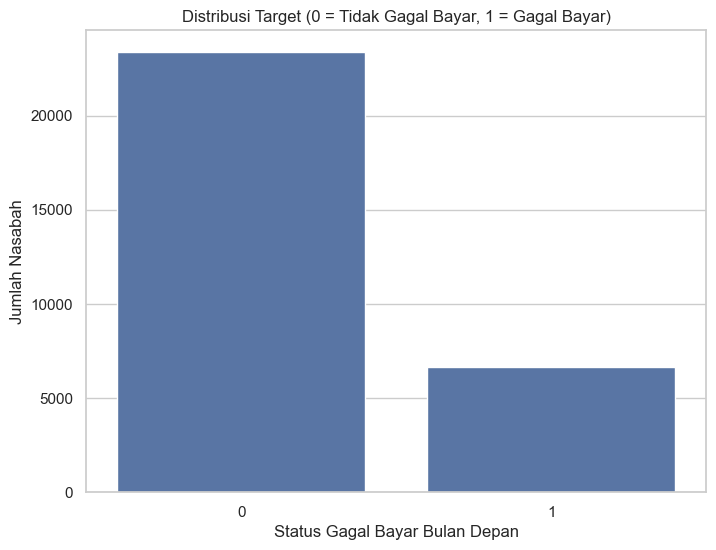

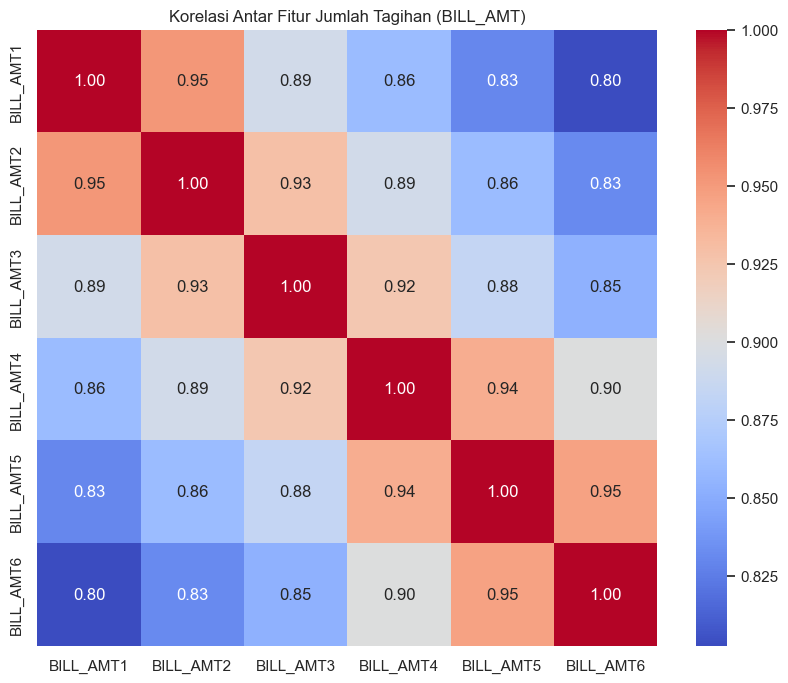

In [16]:
# ====================================================================
# LANGKAH 4: ANALISIS DATA EKSPLORASI (EDA)
# ====================================================================

# Ganti nama kolom target agar lebih mudah diketik
target_col = 'dpnm'

# --- Plot 1: Distribusi Variabel Target ---
plt.figure(figsize=(8, 6))
sns.countplot(x=target_col, data=df_clean)
plt.title('Distribusi Target (0 = Tidak Gagal Bayar, 1 = Gagal Bayar)')
plt.xlabel('Status Gagal Bayar Bulan Depan')
plt.ylabel('Jumlah Nasabah')
plt.show()


# --- Plot 2: Peta Korelasi (Heatmap) untuk Fitur Tagihan ---
# Kita pilih subset fitur agar heatmap mudah dibaca
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[bill_features].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Korelasi Antar Fitur Jumlah Tagihan (BILL_AMT)')
plt.show()

In [18]:
# ====================================================================
# LANGKAH 5: PERSIAPAN AKHIR DAN PEMBAGIAN DATA
# ====================================================================

# 1. Pisahkan fitur (variabel independen, X) dan target (variabel dependen, y)
target_col = 'dpnm'
X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

# 2. Terapkan One-Hot Encoding pada fitur kategorikal
# Model hanya mengerti angka, jadi kita ubah kategori menjadi kolom 0 dan 1
categorical_cols = X.select_dtypes(include=['category']).columns
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print("Fitur setelah One-Hot Encoding:")
display(X_encoded.head())

# 3. Bagi data menjadi data latih (70%) dan data uji (30%)
# stratify=y memastikan distribusi kelas target seimbang di kedua set
# random_state=42 memastikan hasil pembagian data selalu sama setiap kali kode dijalankan
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.30, random_state=42, stratify=y
)

# --- Verifikasi Hasil ---
print(f"\nUkuran data latih (X_train): {X_train.shape}")
print(f"Ukuran data uji (X_test):   {X_test.shape}")
print("\nDistribusi target pada data latih (y_train):")
print(y_train.value_counts(normalize=True))
print("\nDistribusi target pada data uji (y_test):")
print(y_test.value_counts(normalize=True))

Fitur setelah One-Hot Encoding:


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,True,True,False,False,False,False
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,1000,0,2000,True,True,False,False,True,False
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,1000,5000,True,True,False,False,True,False
3,50000,37,0,0,0,0,0,0,46990,48233,...,1200,1100,1069,1000,True,True,False,False,False,False
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,10000,9000,689,679,False,True,False,False,False,False



Ukuran data latih (X_train): (21000, 26)
Ukuran data uji (X_test):   (9000, 26)

Distribusi target pada data latih (y_train):
dpnm
0    0.77881
1    0.22119
Name: proportion, dtype: float64

Distribusi target pada data uji (y_test):
dpnm
0    0.778778
1    0.221222
Name: proportion, dtype: float64


In [19]:
# ====================================================================
# LANGKAH 6: PENANGANAN IMBALANCE DAN SCALING FITUR
# ====================================================================

# 1. Terapkan SMOTE pada data latih
print("Distribusi kelas sebelum SMOTE:")
print(y_train.value_counts())

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nDistribusi kelas setelah SMOTE:")
print(y_train_resampled.value_counts())

# 2. Terapkan StandardScaler
scaler = StandardScaler()

# Fit dan transform HANYA pada data latih yang sudah di-resample
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Transform HANYA pada data uji (menggunakan scaler yang sudah di-fit)
X_test_scaled = scaler.transform(X_test)

# --- Verifikasi Hasil ---
# (Opsional) Mengubah kembali ke DataFrame agar mudah dilihat
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nScaling fitur selesai. Lima baris pertama data latih setelah di-scaling:")
display(X_train_scaled.head())

print("\n--- PERSIAPAN DATA SELESAI ---")

Distribusi kelas sebelum SMOTE:
dpnm
0    16355
1     4645
Name: count, dtype: int64

Distribusi kelas setelah SMOTE:
dpnm
0    16355
1    16355
Name: count, dtype: int64

Scaling fitur selesai. Lima baris pertama data latih setelah di-scaling:


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,0.053980,-0.374314,-0.151218,-0.033282,0.007877,0.058915,0.111953,0.132357,1.463455,1.534605,...,0.069482,0.131893,0.133461,0.064350,0.990143,1.232738,-0.368194,-0.103698,1.134783,-0.090889
1,-0.423904,-0.601985,-0.151218,-0.033282,0.007877,0.058915,1.834030,0.132357,-0.293900,-0.214874,...,0.346007,-0.308902,-0.093632,-0.161830,0.990143,-0.811202,-0.368194,-0.103698,1.134783,-0.090889
2,-0.583199,-0.715821,-0.151218,-0.033282,0.007877,0.058915,0.111953,0.132357,0.329964,0.386741,...,-0.184670,-0.191356,-0.183346,-0.183154,-1.009955,-0.811202,-0.368194,-0.103698,1.134783,-0.090889
3,-1.061083,-0.943492,-0.151218,-0.033282,-0.820636,-0.777502,-1.610123,-1.567781,-0.584194,-0.650883,...,-0.282459,-0.308902,-0.298549,-0.284693,0.990143,1.232738,-0.368194,-0.103698,-0.881226,-0.090889
4,-0.822141,-0.601985,-1.945971,-1.677754,-1.649149,-1.613919,-1.610123,-1.567781,-0.684449,-0.652159,...,-0.282459,-0.308902,-0.298549,-0.284693,0.990143,-0.811202,-0.368194,-0.103698,1.134783,-0.090889



--- PERSIAPAN DATA SELESAI ---


In [20]:
# ====================================================================
# LANGKAH 7: MELATIH MODEL REGRESI LOGISTIK
# ====================================================================

# 1. Inisialisasi model Regresi Logistik
# solver='liblinear' adalah pilihan yang baik untuk dataset berukuran kecil hingga menengah
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# 2. Tentukan hyperparameter yang ingin diuji
# 'C' adalah parameter regularisasi. Nilai kecil berarti regularisasi lebih kuat.
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'] # 'l2' adalah tipe regularisasi yang umum digunakan
}

# 3. Siapkan GridSearchCV
# cv=5 berarti kita menggunakan 5-fold cross-validation
# scoring='roc_auc' adalah metrik yang baik untuk data tidak seimbang
grid = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# 4. Latih model menggunakan data latih yang sudah di-scaling dan di-resample
print("Memulai training model dengan GridSearchCV...")
grid.fit(X_train_scaled, y_train_resampled)
print("Training selesai.")

# --- Dapatkan Model Terbaik ---
# 5. Tampilkan parameter terbaik yang ditemukan
print(f"\nParameter terbaik yang ditemukan: {grid.best_params_}")

# 6. Simpan model terbaik dari hasil pencarian
best_model = grid.best_estimator_

print("\n Langkah 7 Selesai: Model terbaik telah dilatih dan disimpan dalam variabel 'best_model'.")

Memulai training model dengan GridSearchCV...
Training selesai.

Parameter terbaik yang ditemukan: {'C': 10, 'penalty': 'l2'}

 Langkah 7 Selesai: Model terbaik telah dilatih dan disimpan dalam variabel 'best_model'.


--- Confusion Matrix ---


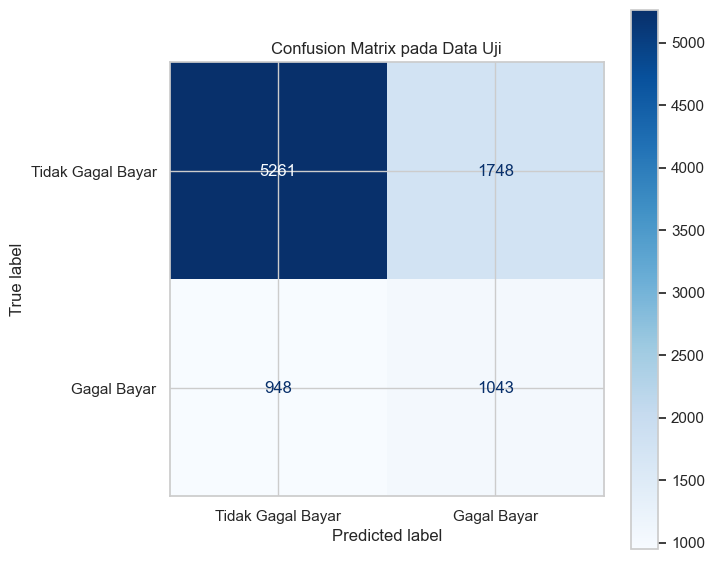


--- Classification Report ---
              precision    recall  f1-score   support

           0     0.8473    0.7506    0.7960      7009
           1     0.3737    0.5239    0.4362      1991

    accuracy                         0.7004      9000
   macro avg     0.6105    0.6372    0.6161      9000
weighted avg     0.7425    0.7004    0.7164      9000


--- ROC AUC Score ---
Skor AUC: 0.6810


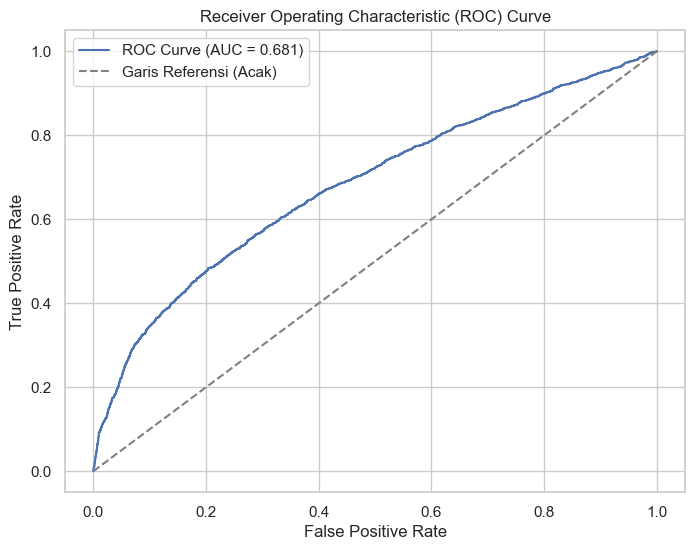


✅ Langkah 8 Selesai: Evaluasi model pada data uji telah ditampilkan.


In [21]:
# ====================================================================
# LANGKAH 8: EVALUASI KINERJA MODEL
# ====================================================================

# 1. Lakukan prediksi pada data uji
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1] # Ambil probabilitas untuk kelas 1 (Default)

# --- Tampilkan Hasil Evaluasi ---

# 2. Confusion Matrix
print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Tidak Gagal Bayar', 'Gagal Bayar'])

fig, ax = plt.subplots(figsize=(7, 7))
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix pada Data Uji')
plt.show()

# 3. Classification Report
print("\n--- Classification Report ---")
# 'digits=4' untuk menampilkan 4 angka di belakang koma
print(classification_report(y_test, y_pred, digits=4))

# 4. ROC Curve dan AUC Score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
print(f"\n--- ROC AUC Score ---")
print(f"Skor AUC: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.3f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Garis Referensi (Acak)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

print("\n✅ Langkah 8 Selesai: Evaluasi model pada data uji telah ditampilkan.")

In [22]:
# ====================================================================
# LANGKAH 9: MENYIMPAN MODEL UNTUK DEPLOYMENT
# ====================================================================

# 1. Simpan model yang sudah dilatih
joblib.dump(best_model, 'artifacts/logistic_model.joblib')

# 2. Simpan scaler
joblib.dump(scaler, 'artifacts/scaler.joblib')

# 3. Simpan daftar urutan kolom/fitur
# Kita ambil dari X_encoded sebelum di-split untuk mendapatkan daftar lengkap
feature_list = X_encoded.columns.tolist()
with open('artifacts/feature_list.json', 'w') as f:
    json.dump(feature_list, f)

print("✅ Model, scaler, dan daftar fitur berhasil disimpan di dalam folder 'artifacts'.")

✅ Model, scaler, dan daftar fitur berhasil disimpan di dalam folder 'artifacts'.
